In [720]:
# Importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [721]:
# Importing dataset

import_df = pd.read_csv(r'D:\Prot\Data Analyst\UM selected projects\A_Stock Data\TCS_stock_history.csv')

In [722]:
# Creating copy of the original dataframe

stock_history_df = import_df.copy()

In [723]:
# Querying for 1st 5 rows after sorting

stock_history_df = stock_history_df.sort_values('Date')
stock_history_df[:5]

,Date,Open,High,Low,Close,Volume,Dividends,Stock_Splits,Avg_Trading
4333,2002-08-12,28.79,29.74,28.79,29.52,212976,0.0,0,29.21
4351,2002-08-13,29.56,30.03,28.91,29.12,153576,0.0,0,29.40
4238,2002-08-14,29.18,29.18,26.56,27.11,822776,0.0,0,28.01
4243,2002-08-16,26.97,28.26,26.58,27.05,811856,0.0,0,27.21
4336,2002-08-19,27.27,27.27,26.13,26.38,205880,0.0,0,26.76


In [724]:
# Querying for missing values

stock_history_df.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock_Splits    0
Avg_Trading     0
dtype: int64

In [725]:
# Summary of the dataset

stock_history_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4438 entries, 4333 to 4271
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          4438 non-null   object 
 1   Open          4438 non-null   float64
 2   High          4438 non-null   float64
 3   Low           4438 non-null   float64
 4   Close         4438 non-null   float64
 5   Volume        4438 non-null   int64  
 6   Dividends     4438 non-null   float64
 7   Stock_Splits  4438 non-null   int64  
 8   Avg_Trading   4438 non-null   float64
dtypes: float64(6), int64(2), object(1)
memory usage: 346.7+ KB


In [726]:
# Changing data type of date from object to datetime

stock_history_df['Date'] = pd.to_datetime(stock_history_df['Date'])

In [727]:
# Analysing total number of rows and columns

stock_history_df.shape

(4438, 9)

In [728]:
# Checking for duplicate values

stock_history_df[stock_history_df.duplicated()]

,Date,Open,High,Low,Close,Volume,Dividends,Stock_Splits,Avg_Trading


* No duplicates values present.

In [730]:
# Statistical summary

stock_history_df.describe(include = "all").T

,count,mean,min,25%,50%,75%,max,std
Date,4438,2012-09-08 01:32:28.445245696,2002-08-12 00:00:00,2008-03-05 12:00:00,2012-09-19 00:00:00,2017-03-30 18:00:00,2021-09-30 00:00:00,NaN
Open,4438.0,870.955507,24.15,190.415,534.765,1156.64,3930.0,830.246099
High,4438.0,880.749238,27.1,192.65,538.05,1167.2175,3981.75,838.604074
Low,4438.0,860.615297,24.15,186.71,527.96,1144.925,3892.1,821.579005
Close,4438.0,870.554439,26.38,189.66,534.705,1155.225,3954.55,829.952478
Volume,4438.0,3557805.811627,4560.0,1872004.0,2768333.0,4284931.0,88067154.0,3271920.094731
Dividends,4438.0,0.071942,0.0,0.0,0.0,0.0,40.0,0.968104
Stock_Splits,4438.0,0.001352,0.0,0.0,0.0,0.0,2.0,0.051988
Avg_Trading,4438.0,870.718594,26.59,189.84,533.02,1156.09,3926.79,830.05633


* Mean Open and Close price are nearly same. There is very minimal price change for every trading session.
* Mean High and Low indicates that this stock is well traded in every trading session. And so does the Volume traded indicates.
* There is rarely any Dividends and Stock splits given by the company.

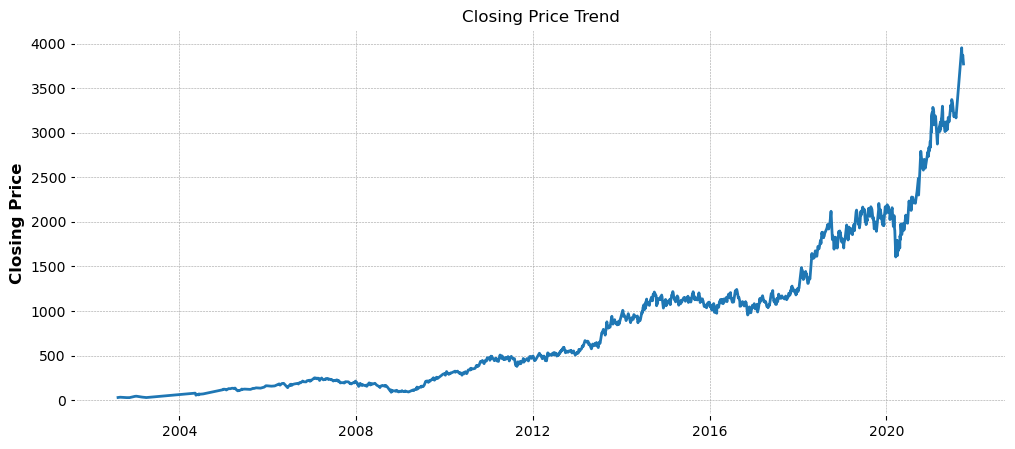

In [732]:
# Plotting Closing price trend 

plt.figure(figsize = (12,5))
sns.lineplot(x = 'Date', y = 'Close',data = stock_history_df)
plt.title('Closing Price Trend')
plt.xlabel('')
plt.ylabel('Closing Price')

plt.show()

* Closing price trend increases gradually. It is a good sign for long term investors.

In [734]:
# Creating daily returns columns

stock_history_df['Daily Return'] = (stock_history_df['Close'].pct_change() * 100).round(2)
stock_history_df

,Date,Open,High,Low,Close,Volume,Dividends,Stock_Splits,Avg_Trading,Daily Return
4333,2002-08-12,28.79,29.74,28.79,29.52,212976,0.0,0,29.21,NaN
4351,2002-08-13,29.56,30.03,28.91,29.12,153576,0.0,0,29.40,-1.36
4238,2002-08-14,29.18,29.18,26.56,27.11,822776,0.0,0,28.01,-6.90
4243,2002-08-16,26.97,28.26,26.58,27.05,811856,0.0,0,27.21,-0.22
4336,2002-08-19,27.27,27.27,26.13,26.38,205880,0.0,0,26.76,-2.48
...,...,...,...,...,...,...,...,...,...,...
2735,2021-09-24,3890.00,3944.40,3855.00,3871.30,2320754,0.0,0,3890.17,0.05
3580,2021-09-27,3900.00,3904.00,3802.90,3836.95,1673362,0.0,0,3860.96,-0.89
2831,2021-09-28,3850.00,3850.00,3751.25,3779.15,2253075,0.0,0,3807.60,-1.51
2534,2021-09-29,3759.80,3806.00,3722.15,3791.90,2489161,0.0,0,3769.96,0.34


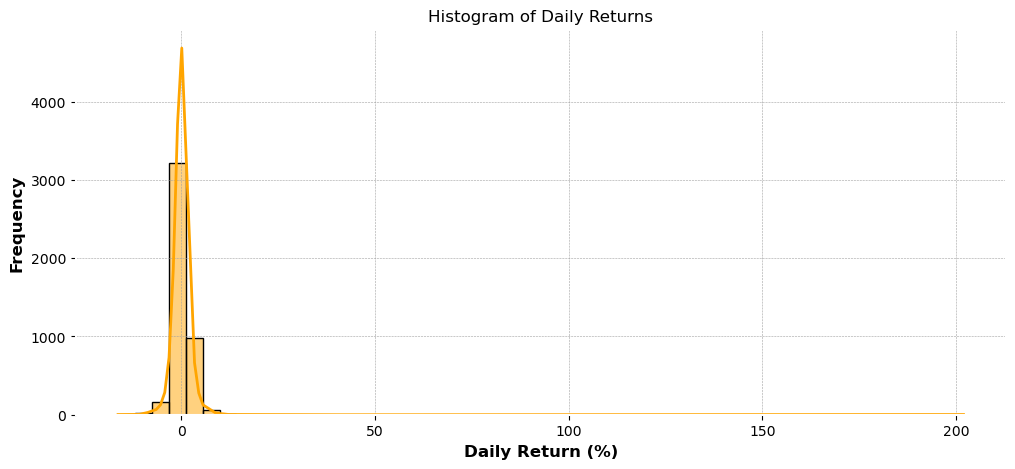

In [735]:
# Ploting daily returns

plt.figure(figsize = (12,5))
sns.histplot(data = stock_history_df['Daily Return'].dropna(),bins = 50 , color = 'orange',kde = True)
plt.title("Histogram of Daily Returns")
plt.xlabel("Daily Return (%)")
plt.ylabel("Frequency")

plt.show()

* Most of the daily return percentage are between -10 to 1. Some gives returns of upto 12% positive per trading session. 

In [737]:
# Calculating top 10 best performance days

top10_best_days = stock_history_df.nlargest(10, 'Daily Return')
top10_best_days

,Date,Open,High,Low,Close,Volume,Dividends,Stock_Splits,Avg_Trading,Daily Return
4426,2004-05-06,88.20,91.09,84.62,86.17,19760,0.00,0,87.52,201.93
4378,2009-05-18,151.06,155.99,136.96,146.58,73380,0.00,0,147.65,15.49
5,2009-07-20,176.52,204.24,176.52,198.55,34539536,0.00,0,188.96,15.31
77,2008-10-21,104.82,110.56,96.05,108.85,11804900,0.00,0,105.07,13.79
22,2012-04-24,464.93,499.32,462.98,494.85,18113782,0.00,0,480.52,12.21
4387,2004-05-24,60.04,66.91,60.04,66.61,54792,0.00,0,63.40,10.89
3900,2002-12-02,33.37,36.43,33.07,35.24,1388680,0.00,0,34.53,10.75
220,2020-03-20,1600.30,1834.94,1597.35,1764.69,8547498,0.00,0,1699.32,9.84
94,2008-10-29,110.08,112.63,103.86,105.93,10955572,0.75,0,108.12,9.53
722,2008-01-23,165.74,171.72,155.32,168.24,5359120,0.75,0,165.25,9.37


In [738]:
# Calculating top 10 worst performance days

top10_worst_days = stock_history_df.nsmallest(10, 'Daily Return')
top10_worst_days

,Date,Open,High,Low,Close,Volume,Dividends,Stock_Splits,Avg_Trading,Daily Return
4401,2004-05-17,63.20,63.20,53.18,55.42,33968,0.0,0,58.75,-16.28
52,2008-04-22,190.04,190.04,170.17,171.18,13785196,0.0,0,180.36,-10.69
62,2009-05-19,147.79,147.79,129.19,131.98,13015576,0.0,0,139.19,-9.96
205,2020-03-12,1855.74,1860.03,1713.79,1724.99,8728786,0.0,0,1788.64,-9.41
791,2009-03-30,105.18,112.32,102.08,103.11,5148188,0.0,0,105.67,-8.98
270,2008-10-16,102.21,102.93,91.10,96.37,8031800,0.0,0,98.15,-8.86
226,2008-10-24,98.07,104.43,85.66,97.12,8479936,0.0,0,96.32,-8.85
130,2014-10-17,1081.82,1097.71,1062.15,1067.03,9892812,0.0,0,1077.18,-8.85
735,2008-10-15,113.89,114.60,104.22,105.74,5308752,0.0,0,109.61,-8.36
8,2005-04-19,124.27,126.04,110.08,112.94,27235152,0.0,0,118.33,-8.34


* Best performing day has given returns upto 201.93%. There might be some misinformation about the stock.
* Worst performing day has fallen upto -16.28%. There might be a huge correction on that day or panic in the market.

In [740]:
# Creating new columns for Year,month,day extracted from Date column and Previous close column from close column

stock_history_df['Year'] = stock_history_df['Date'].dt.year
stock_history_df['Month'] = stock_history_df['Date'].dt.month
stock_history_df['Day'] = stock_history_df['Date'].dt.day
stock_history_df['Prev_close'] = stock_history_df['Close'].shift(1)

In [741]:
# Creating simple moving averages for 50 and 200 days

stock_history_df['SMA-50'] = stock_history_df['Close'].rolling(window = 50).mean()
stock_history_df['SMA-200'] = stock_history_df['Close'].rolling(window = 200).mean()

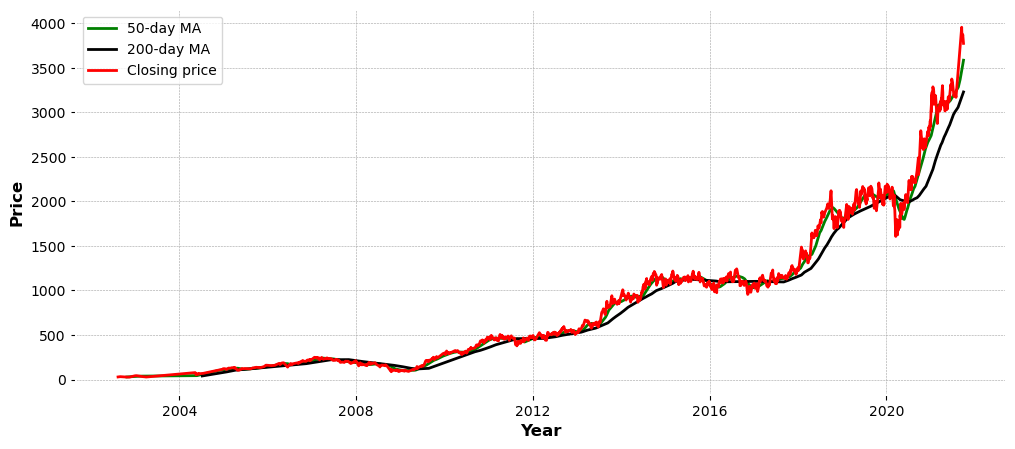

In [742]:
# Plotting the Moving averages derived above

plt.figure(figsize = (12,5))
plt.plot(stock_history_df['Date'], stock_history_df['SMA-50'], label='50-day MA',color = 'green')
plt.plot(stock_history_df['Date'], stock_history_df['SMA-200'], label='200-day MA',color = 'black')
plt.plot(stock_history_df['Date'], stock_history_df['Close'], label='Closing price',color = 'red')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

* Closing price is higher compared to 200 day moving average and 50 day moving average. Stock is bit expensive then.

In [744]:
# Indexing the date column for resampling

stock_history_df = stock_history_df.set_index('Date')

In [745]:
# Monthly average closing price

monthly_avg_closing_price = stock_history_df['Close'].resample('ME').mean()
monthly_avg_closing_price

Date
2002-08-31      29.405714
2002-09-30      30.038000
2002-10-31      27.915714
2002-11-30      29.044444
2002-12-31      38.547143
                 ...     
2021-05-31    3084.590000
2021-06-30    3251.250455
2021-07-31    3222.618571
2021-08-31    3482.064286
2021-09-30    3834.023810
Freq: ME, Name: Close, Length: 230, dtype: float64

In [746]:
# Yearly average return

yearly_avg = stock_history_df['Close'].resample('YE').mean()
yearly_avg

Date
2002-12-31      31.180426
2003-12-31      36.435833
2004-12-31      88.574398
2005-12-31     128.546331
2006-12-31     182.624291
2007-12-31     220.071250
2008-12-31     153.058122
2009-12-31     173.280720
2010-12-31     348.773360
2011-12-31     458.301463
2012-12-31     515.423388
2013-12-31     715.330565
2014-12-31    1023.768223
2015-12-31    1121.778740
2016-12-31    1091.715610
2017-12-31    1138.605726
2018-12-31    1671.464228
2019-12-31    2002.473347
2020-12-31    2226.073120
2021-12-31    3260.444919
Freq: YE-DEC, Name: Close, dtype: float64

In [747]:
# Year end close price

yearly_close_price = stock_history_df['Close'].resample('YE').last()
yearly_close_price

Date
2002-12-31      44.70
2003-12-31      28.54
2004-12-31     124.45
2005-12-31     160.42
2006-12-31     232.35
2007-12-31     207.10
2008-12-31      93.61
2009-12-31     289.30
2010-12-31     475.04
2011-12-31     479.62
2012-12-31     526.24
2013-12-31     924.30
2014-12-31    1120.47
2015-12-31    1088.79
2016-12-31    1076.14
2017-12-31    1253.03
2018-12-31    1782.43
2019-12-31    2102.14
2020-12-31    2837.21
2021-12-31    3773.20
Freq: YE-DEC, Name: Close, dtype: float64

In [748]:
# Resetting the index column the date column for resampling

stock_history_df = stock_history_df.reset_index('Date')

In [749]:
# Calculating rolling standard deviation(Volatility)

stock_history_df['20d_Volatility'] = stock_history_df['Close'].rolling(window = 20).std()
stock_history_df['50d_Volatility'] = stock_history_df['Close'].rolling(window = 50).std()
stock_history_df['200d_Volatility'] = stock_history_df['Close'].rolling(window = 200).std()

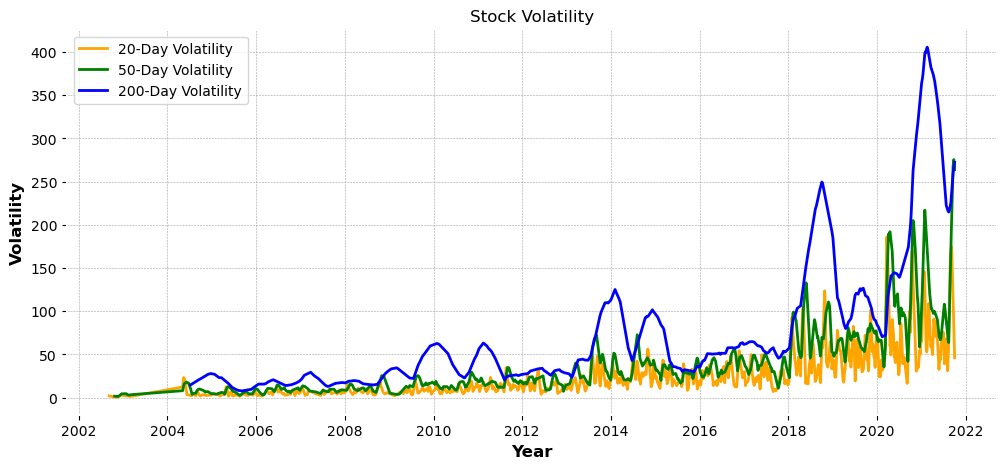

In [750]:
# Plotting the volatility

plt.figure(figsize = (12,5))

plt.plot(stock_history_df['Date'],stock_history_df['20d_Volatility'],label = '20-Day Volatility',color = 'orange')
plt.plot(stock_history_df['Date'],stock_history_df['50d_Volatility'],label = '50-Day Volatility',color = 'green')
plt.plot(stock_history_df['Date'],stock_history_df['200d_Volatility'],label = '200-Day Volatility',color = 'blue')
plt.title('Stock Volatility')
plt.xlabel('Year')
plt.ylabel('Volatility')
plt.legend()
plt.show()

* 20 day and 50 day trading shows more volatility. Investors might need to invest for long term to minimise the risk.

In [752]:
# Calculating cumulative return

stock_history_df['Cumulative Return'] = ((1 + stock_history_df['Daily Return']).cumprod() - 1).round(2)

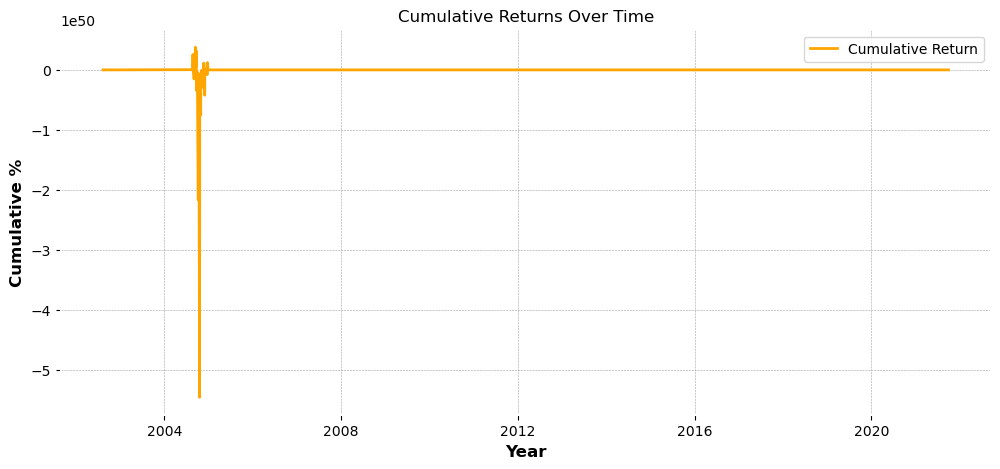

In [753]:
# Plotting the cumulative return

plt.figure(figsize = (12,5))
plt.plot(stock_history_df['Date'],stock_history_df['Cumulative Return'],label = 'Cumulative Return',color = 'orange')
plt.title('Cumulative Returns Over Time')
plt.xlabel('Year')
plt.ylabel('Cumulative %')
plt.legend()
plt.show()

* Cumulative return is nearly 0. As from previous analysis there hardly any profit on daily basis.

#### Analysis

* No duplicate values found.
* Day trading seems more prevalent in this stock.
* Dividends and Stock Splits are rare.
* This stock is for long term investment as price increases in long run. Day traders may loose good amount of money.
* 200 day Moving average shows the stock price is expensive. Investors need to wait for the price to fall.
* 20 day and 50 day standard deviation shows the stock is highly volatile for day traders.
* cumulative return shown negligible profit.
* In a nutshell this stock is good for long term investments.